# Description of Algorithm
(how did you conduct pre-/post- processing, parameter selection)

# **project_dataset1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install git+git://github.com/rasbt/mlxtend.git

  Cloning git://github.com/rasbt/mlxtend.git to /tmp/pip-req-build-eb0xmf8e
  Running command git clone -q git://github.com/rasbt/mlxtend.git /tmp/pip-req-build-eb0xmf8e
  Created wheel for mlxtend: filename=mlxtend-0.18.0-py2.py3-none-any.whl size=1588831 sha256=da6a41e7863fea2de4532c2f87282b8add68cb33c9f9d57288b08480c504e6a1
  Stored in directory: /tmp/pip-ephem-wheel-cache-lp2s2dev/wheels/85/e4/4c/ee71547ac9ea223b07fe8f55b0e5f71536a6a34ae3480205f3
Successfully built mlxtend
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.evaluate import bias_variance_decomp
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
!ls drive/My\ Drive/ML\ Project/data/

project3_dataset1.txt  project3_dataset2.txt


In [ ]:
# You might need to change this path or put the ML project folder in your drive 
import_path = 'drive/My Drive/ML Project/data/project3_dataset1.txt'
dataset_1 = pd.read_csv(import_path, sep="\t", header=None)
dataset_1.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.024230,0.039500,0.016780,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637,1
1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440,1
2,11.26,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.05588,0.2595,0.06233,0.4866,1.9050,2.877,34.68,0.015740,0.082620,0.080990,0.034870,0.03418,0.006517,11.86,22.33,78.27,437.6,0.1028,0.18430,0.15460,0.09314,0.2955,0.07009,0
3,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,0.05865,0.1759,0.9938,1.143,12.67,0.005133,0.015210,0.014340,0.008602,0.01501,0.001588,12.32,22.02,79.93,462.0,0.1190,0.16480,0.13990,0.08476,0.2676,0.06765,0
4,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,0.3160,0.9115,1.954,28.90,0.005031,0.006021,0.005325,0.006324,0.01494,0.000895,16.46,21.75,103.70,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695,0



##Split into labels and data

In [ ]:
dataset1_features = dataset_1.drop([30], axis = 1) # and drop whatever other featuers you dont want to use in your algorithm
dataset1_labels = dataset_1[30].copy()

## Train/Test Split to Avoid Overfitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset1_features, dataset1_labels, test_size=0.20)

##Normalization

In [ ]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

dataset1_prepared = num_pipeline.fit_transform(X_train)
dataset1_test_prepared = num_pipeline.fit_transform(X_test)

In [ ]:
# Check to see if the shapes match
print(X_train.shape)
print(dataset1_prepared.shape)

(455, 30)
(455, 30)


##Training and Predictions

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(dataset1_prepared, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(dataset1_test_prepared)

In [ ]:
print("Train Accuracy:", classifier.score(dataset1_prepared, y_train))
print("Test Accuracy:", classifier.score(dataset1_test_prepared, y_test))

Train Accuracy: 0.9736263736263736
Test Accuracy: 0.9736842105263158


## Hyperparameter Tuning

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(dataset1_prepared, y_train)
    pred_i = knn.predict(dataset1_test_prepared)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

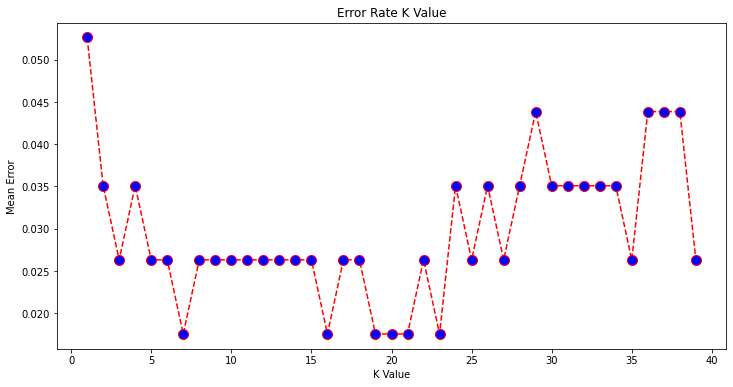

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
knn = KNeighborsClassifier()

#List Hyperparameters to tune
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Making model
clf = GridSearchCV(knn, hyperparameters, cv=10)
best_model = clf.fit(dataset1_prepared, y_train)
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
#Predict testing set
y_pred = best_model.predict(dataset1_test_prepared)
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))

Best leaf_size: 1
Best p: 1
Best n_neighbors: 3
0.9736842105263158


## 10 fold cross validation

In [ ]:
print("Train Accuracy:", best_model.score(dataset1_prepared, y_train))
print("Test Accuracy:", best_model.score(dataset1_test_prepared, y_test))

Train Accuracy: 0.9802197802197802
Test Accuracy: 0.9736842105263158


In [ ]:
scores = cross_val_score(best_model, dataset1_prepared, y_train, cv=10, verbose=1, n_jobs=4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Accuracy: 0.96 (+/- 0.05)


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 16.0min finished


## Accuracy, Precision, Recall, F-1 measure, and AUC

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[69  1]
 [ 2 42]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        70
           1       0.98      0.95      0.97        44

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test+1, y_pred, pos_label=2)
metrics.auc(fpr, tpr)

0.9701298701298702

In [ ]:
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

In [ ]:
print(precision)
print(recall)

0.9767441860465116
0.9545454545454546


## Bias-Variance tradeoff

In [ ]:
def plot_bias_var_tradeoff(parameters, bias, variance, err):
  x = range(0, 30, 5)
  plt.figure(figsize=(12,12))
  plt.plot(x, bias, marker='o')
  plt.plot(x, variance, marker='o',)
  plt.plot(x, err, marker='o',)
  plt.legend(["Bias", "Variance", "Error"])
  # plt.xticks(np.arange(min(parameters), max(parameters), 1.0))
  plt.title('Bias-Variance tradeoff', fontsize=18)
  plt.xlabel('k', fontsize=18)
  plt.ylabel('Error', fontsize=18)

Dataset 1:


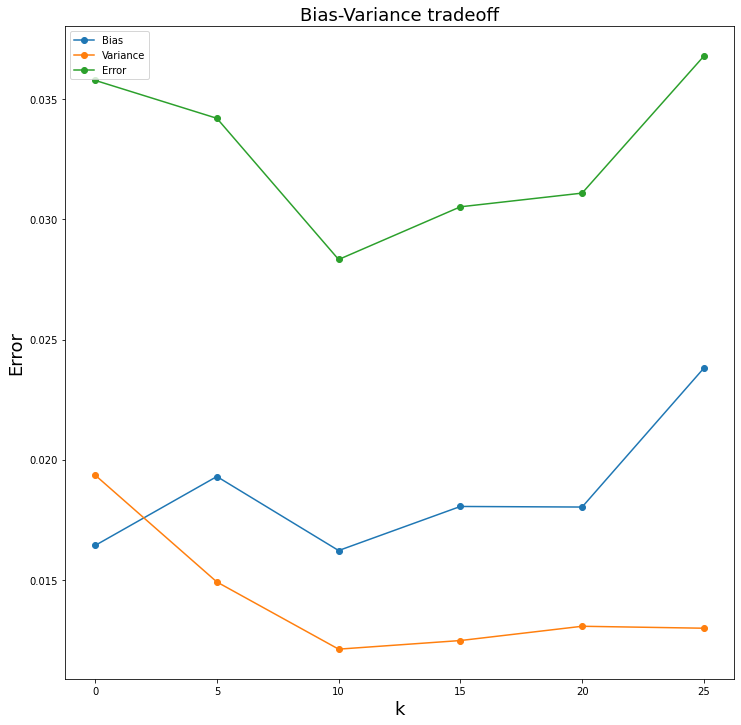

In [ ]:
k_vals = [5, 10, 15, 20, 25, 30]
print('Dataset 1:')
bias_1 = []
var_1 = []
err_1 = []
for x in k_vals:
  # normalise data
  num_pipeline = Pipeline([('std_scaler', StandardScaler())])
  X_train_temp = num_pipeline.fit_transform(X_train)
  X_test_temp = num_pipeline.fit_transform(X_test)
  # setup Logistic Regression
  knn = KNeighborsClassifier(n_neighbors = x)
  # Predict
  knn.fit(X_train_temp, y_train)
  mse, bias, var = bias_variance_decomp(knn, np.array(X_train_temp), np.array(y_train), np.array(X_test_temp), np.array(y_test), loss='mse', num_rounds=200, random_seed=1)
  # Calculate matrices
  bias_1.append(bias)
  var_1.append(var)
  err_1.append(mse)

# plot
plot_bias_var_tradeoff(k_vals, bias_1, var_1, err_1)

# https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/
# https://www.machinecurve.com/index.php/2020/11/02/machine-learning-error-bias-variance-and-irreducible-error-with-python/#bias-error
# http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.evaluate/#bias_variance_decomp

# **project_dataset2**

In [ ]:
import_path = 'drive/My Drive/ML Project/data/project3_dataset2.txt'
dataset_2 = pd.read_csv(import_path, sep="\t", header=None)
dataset_2.head()

,0,1,2,3,4,5,6,7,8,9
0,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
1,123,0.05,4.61,13.69,Absent,51,23.23,2.78,16,0
2,128,0.50,3.70,12.81,Present,66,21.25,22.73,28,0
3,114,9.60,2.51,29.18,Absent,49,25.67,40.63,46,0
4,150,0.30,6.38,33.99,Present,62,24.64,0.00,50,0


## Split into labels and data

In [ ]:
dataset2_features = dataset_2.drop([9], axis = 1) # and drop whatever other featuers you dont want to use in your algorithm
dataset2_labels = dataset_2[9].copy()
dataset2_features[4] = 0 if dataset2_labels[4]=='Absent' else 1 #Convert absent and present into binary 0 and 1 respectively

##Train/Test Split to Avoid Overfitting

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(dataset2_features, dataset2_labels, test_size=0.20)

##Normalization

In [ ]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

dataset2_prepared = num_pipeline.fit_transform(X_train2)
dataset2_test_prepared = num_pipeline.fit_transform(X_test2)

In [ ]:

# Check to see if the shapes match
print(X_train2.shape)
print(dataset2_prepared.shape)

(369, 9)
(369, 9)


## Training and Predictions

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(dataset2_prepared, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [ ]:
y_pred2 = classifier.predict(dataset2_test_prepared)


In [ ]:
print("Train Accuracy:", classifier.score(dataset2_prepared, y_train2))
print("Test Accuracy:", classifier.score(dataset2_test_prepared, y_test2))

Train Accuracy: 0.7127371273712737
Test Accuracy: 0.6774193548387096


## Hyperparameter Tuning

In [ ]:
error2 = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(dataset2_prepared, y_train2)
    pred_i = knn.predict(dataset2_test_prepared)
    error2.append(np.mean(pred_i != y_test2))

Text(0, 0.5, 'Mean Error')

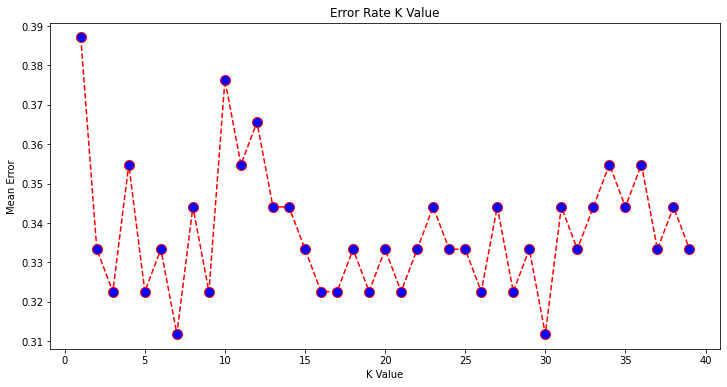

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error2, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

#List Hyperparameters to tune
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Making model
clf2 = GridSearchCV(knn, hyperparameters, cv=10)
best_model2 = clf2.fit(dataset2_prepared, y_train2)
#Best Hyperparameters Value
print('Best leaf_size:', best_model2.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model2.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model2.best_estimator_.get_params()['n_neighbors'])
#Predict testing set
y_pred2 = best_model2.predict(dataset2_test_prepared)
#Check performance using accuracy
print(accuracy_score(y_test2, y_pred2))

Best leaf_size: 1
Best p: 2
Best n_neighbors: 22
0.6666666666666666


In [ ]:
print("Train Accuracy:", best_model2.score(dataset2_prepared, y_train2))
print("Test Accuracy:", best_model2.score(dataset2_test_prepared, y_test2))

Train Accuracy: 0.7046070460704607
Test Accuracy: 0.6666666666666666


## 10 Fold Cross Validation

In [ ]:
scores2 = cross_val_score(best_model2, dataset2_prepared, y_train2, cv=10, verbose=1, n_jobs=4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Accuracy: 0.68 (+/- 0.17)


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 10.8min finished


## Accuracy, Precision, Recall, F-1 measure, and AUC

In [ ]:
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[54  5]
 [26  8]]
              precision    recall  f1-score   support

           0       0.68      0.92      0.78        59
           1       0.62      0.24      0.34        34

    accuracy                           0.67        93
   macro avg       0.65      0.58      0.56        93
weighted avg       0.65      0.67      0.62        93



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test2+1, y_pred2, pos_label=2)
metrics.auc(fpr, tpr)

0.5752741774675972

In [ ]:
precision = metrics.precision_score(y_test2, y_pred2)
recall = metrics.recall_score(y_test2, y_pred2)

In [ ]:
print(precision)
print(recall)

0.6153846153846154
0.23529411764705882


## Bias Variance Tradeoff

In [ ]:
def plot_bias_var_tradeoff(parameters, bias, variance, err):
  x = range(0, 70, 5)
  plt.figure(figsize=(12, 6))
  plt.plot(x, bias, marker='o')
  plt.plot(x, variance, marker='o',)
  plt.plot(x, err, marker='o',)
  plt.legend(["Bias", "Variance", "Error"])
  # plt.xticks(np.arange(min(parameters), max(parameters), 1.0))
  plt.title('Bias-Variance tradeoff', fontsize=18)
  plt.xlabel('k', fontsize=18)
  plt.ylabel('Error', fontsize=18)

Dataset 2:


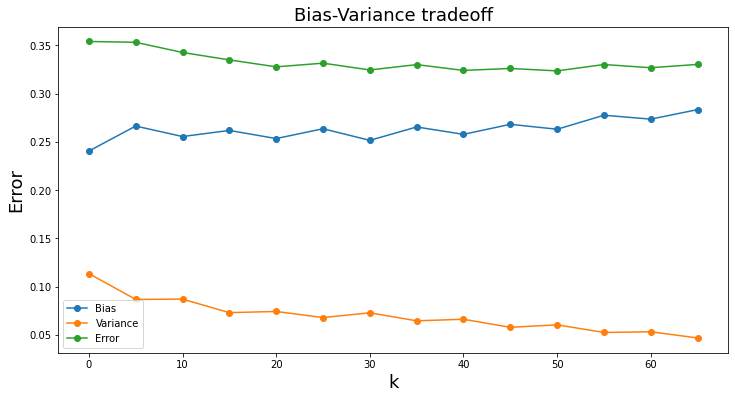

In [ ]:
#k_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
k_vals = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
print('Dataset 2:')
bias_1 = []
var_1 = []
err_1 = []
for x in k_vals:
  # normalise data
  num_pipeline = Pipeline([('std_scaler', StandardScaler())])
  X_train_temp = num_pipeline.fit_transform(X_train2)
  X_test_temp = num_pipeline.fit_transform(X_test2)
  # setup Logistic Regression
  knn = KNeighborsClassifier(n_neighbors = x)
  # Predict
  knn.fit(X_train_temp, y_train2)
  mse, bias, var = bias_variance_decomp(knn, np.array(X_train_temp), np.array(y_train2), np.array(X_test_temp), np.array(y_test2), loss='mse', num_rounds=200, random_seed=1)
  # Calculate matrices
  bias_1.append(bias)
  var_1.append(var)
  err_1.append(mse)

# plot
plot_bias_var_tradeoff(k_vals, bias_1, var_1, err_1)